<a href="https://colab.research.google.com/github/maoya23/Generative-Model-bigginer/blob/main/Lesson1_%E7%A2%BA%E7%8E%87%E5%88%86%E5%B8%83.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 生成モデルを理解する lesson1

### chapter1 : まずは確率分布の理解から

- 大前提として確率の大事な基本的な法則について


$$
加法定理：p(X)=∑_{Y} p(X,Y)
$$
</br>
$$
乗法定理：p(X,Y)=p(Y|X)p(X)
$$
</br>
$$
ベイズの定理：p(Y|X)=\frac{p(X|Y)p(Y)}{p(X)}
$$
</br>
</br>
$$
p(X,Y)は同時分布,p(Y|X)は尤度関数,p(X)は事前分布, p(X|Y)は事後分布
$$

## chapter2 : ガウス分布

分布の中で最も重要なのがガウス分布で式は以下のように示される。</br>

$$
p(x) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{(x-\mu)^2}{2\sigma^2}\right)
$$

### ガウス分布の特性
以下に、期待値と分散についての説明を記す。</br></br>

期待値：一回の観測で得られる値の平均値</br>
分散：確率変数のとる値がどのくらい平均$μ$の周りにバラつくのか

</br>
ガウス分布については
期待値と$\mu$の値は一致する。



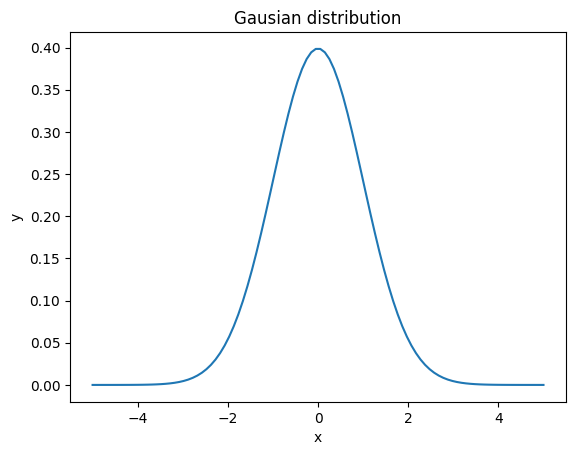

In [ ]:
#ガウス分布の図示
import numpy as np
import matplotlib.pyplot as plt

def normal(x,mu,sigma):
  return 1/(np.sqrt(2*np.pi)*sigma)*np.exp(-(x-mu)**2/(2*sigma**2))

#ここから図示

x=np.linspace(-5,5,100)
y=normal(x,mu=0,sigma=1)

plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Gausian distribution')
plt.show()

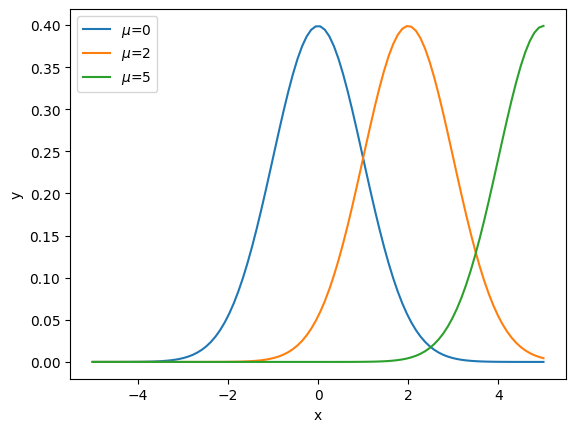

In [ ]:
# 平均をずらして図示する

x=np.linspace(-5,5,100)

y1=normal(x,mu=0,sigma=1)
y2=normal(x,mu=2,sigma=1)
y3=normal(x,mu=5,sigma=1)

for i ,j in zip([y1,y2,y3],[0,2,5]):
  plt.plot(x,i,label='$\mu$='+str(j))

plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Chapter3 中心極限定理

ガウス分布が重宝されるうちの一つで中心極限定理がある。</br></br>

#### 中心極限定理：</br>
任意の確率分布$p(x)$に対して、母集団の平均と分散をそれぞれ $\mu$, $\sigma^2$ とすると</br>
サンプル平均は平均が$\mu$ , 分散が$\sigma^2/N$の正規分布に近づく。</br></br>




Text(0.5, 1.0, 'N=1')

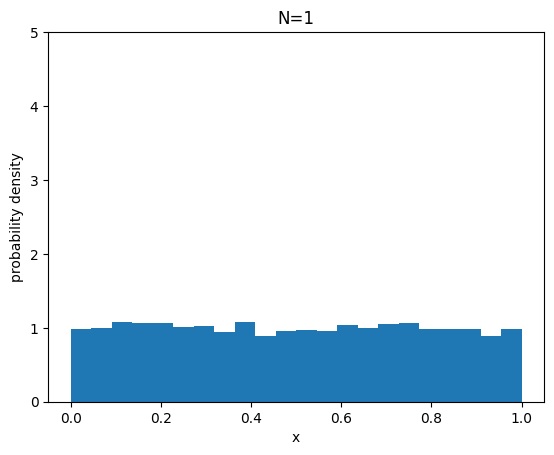

In [ ]:
# 中心極限定理の実験

x_means=[]
N=1

for _ in range(10000):
  xs=[]
  for n in range(N):
    x=np.random.rand()#一様分布からN回ランダムに値を抽出
    xs.append(x)
  mean=np.mean(xs)
  x_means.append(mean)

#グラフの描画
plt.hist(x_means,bins='auto',density=True)
plt.ylim(0,5)
plt.xlabel('x')
plt.ylabel('probability density')
plt.title(f'N={N}')


### Nの値を大きくして実験してみる。

- だんだんガウス分布に近づくのがわかる

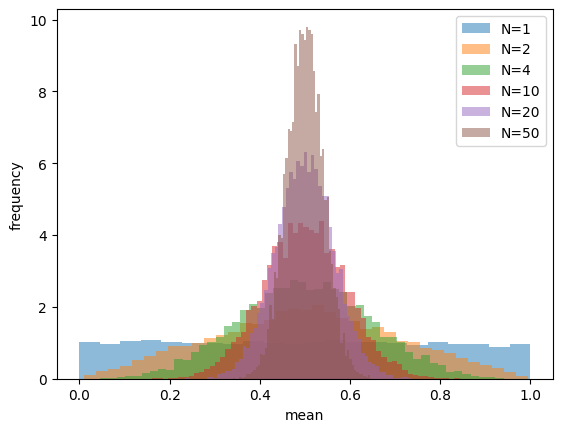

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# シミュレーション回数
num_simulations = 10000

# Nのリスト
N_list = [1, 2, 4, 10, 20, 50]

# 各Nにおける平均値を格納する辞書
means = {}
for N in N_list:
    means[N] = []

# シミュレーション
for N in N_list:
  for _ in range(num_simulations):
    xs=[]
    for n in range(N):
      x=np.random.rand()
      xs.append(x)
    mean=np.mean(xs)
    means[N].append(mean)



# ヒストグラムの描画
_, ax = plt.subplots()
for N in N_list:
    ax.hist(means[N], bins='auto', alpha=0.5, label=f'N={N}',density=True)#density=Trueにすることで、確率密度関数に変換してくれる

# グラフの装飾
ax.set_xlabel('mean')
ax.set_ylabel('frequency')

ax.legend()

plt.show()

# 演習

- カテゴリ分布の分布を書いてください
- それを使って、カテゴリ分布のサンプル分布がガウス分布になることを示してください

0.5898339339012227


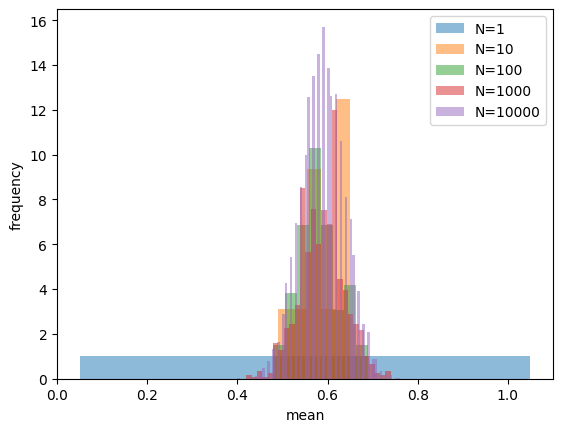

In [35]:
import numpy as np
import matplotlib.pyplot as plt

n=100
mu=np.random.rand()
print(mu)
numlist=[1,10,100,1000,10000]

Means={}
for i in numlist:
  Means[i]=[np.random.multinomial(n,(mu,1-mu),size=None)[0]/n for j in range(i)]

_,ax=plt.subplots()
for i in numlist:
  ax.hist(Means[i],bins="auto",alpha=0.5,label=f'N={i}',density=True)

ax.set_xlabel('mean')
ax.set_ylabel('frequency')
ax.legend()
plt.show()
